# CASO REAL DE NEGOCIO:

## 1 -  Descripción del caso de negocio

La empresa para la que trabajas te ha facilitado un dataset con datos de clientes. Te piden que hagas un análisis de los datos para poder responder a las siguientes preguntas relacionadas con el valor de vida del cliente: ***(CLV - Customer Lifetime Value)***
- ¿Cuál es el valor de vida del cliente?
- ¿Cuál es el valor de vida del cliente por canal de adquisición?
- ¿Cuál es el valor de vida del cliente por producto?
- ¿Cuál es el valor de vida del cliente por mes de adquisición?
- ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

Por otro lado quieren poder visualizar los datos de forma que se puedan ver las siguientes relaciones:
- Valor de vida del cliente vs edad
- Valor de vida del cliente vs edad y sexo
- Valor de vida del cliente vs edad y producto
- Valor de vida del cliente vs edad y canal de adquisición
- Valor de vida del cliente vs edad, sexo y producto
- Valor de vida del cliente vs edad, sexo y canal de adquisición

Además de ello, quieren que analices las campañas de marketing que han realizado contestando a las siguientes preguntas:
- ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

Una vez hayas realizado el añalisis, tendrás que presentar tus respuestas a las preguntas que te han realizado apoyándote en los gráficos que hayas realizado para ello, además de cualquier otro insight que hayas encontrado en el análisis y consideres relevante para el negocio.

## 2 - Descripcion de los datos:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  

## 3 - Tu Análisis

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None) # para que salgan todas las columnas en el display del df

data=pd.read_csv('Marketing-Customer-Analysis.csv')

data.columns=[e.lower().replace(' ', '_') for e in data.columns] # para que todas las columnas esten en minusculas y con guion bajo

data.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# Tu trabajo aquí

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
display(data.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

None

In [37]:
data['edad'] = data['months_since_policy_inception'].astype(float)
data['edad_años'] = (data['edad']/12).round()
data['edad_dias'] = (data['edad']/12)*365
data['mes'] = pd.to_datetime(data['effective_to_date']).dt.month

## 1 - Respondiendo preguntas


In [38]:


# Valor de vida promedio del cliente
valor_vida_cliente = data['customer_lifetime_value'].mean()
print(f'Valor de vida promedio del cliente: \n \n{valor_vida_cliente} \n')

# Valor de vida del cliente por canal de adquisición
valor_vida_por_canal = data.groupby('sales_channel')['customer_lifetime_value'].mean()
valor_vida_por_canal = pd.DataFrame(valor_vida_por_canal)
print('Valor de vida del cliente por canal de adquisición: \n')
display(valor_vida_por_canal)

# Valor de vida del cliente por producto
valor_vida_por_producto = data.groupby('coverage')['customer_lifetime_value'].mean()
valor_vida_por_producto = pd.DataFrame(valor_vida_por_producto)
print('Valor de vida del cliente por producto: \n')
display(valor_vida_por_producto)

# Valor de vida del cliente por mes de adquisición
valor_vida_por_mes = data.groupby('mes')['customer_lifetime_value'].mean()
valor_vida_por_mes = pd.DataFrame(valor_vida_por_mes)
print('Valor de vida del cliente por mes de adquisición: \n')
display(valor_vida_por_mes)

# Valor de vida del cliente por mes de adquisición y canal de adquisición
valor_vida_por_mes_canal = data.groupby(['mes', 'sales_channel'])['customer_lifetime_value'].mean()
valor_vida_por_mes_canal = pd.DataFrame(valor_vida_por_mes_canal)
print('Valor de vida del cliente por mes de adquisición y canal de adquisición: \n')
display(valor_vida_por_mes_canal)

Valor de vida promedio del cliente: 
 
8004.940474987081 

Valor de vida del cliente por canal de adquisición: 



,customer_lifetime_value
sales_channel,
Agent,7957.709353
Branch,8119.711861
Call Center,8100.085753
Web,7779.788057


Valor de vida del cliente por producto: 



,customer_lifetime_value
coverage,
Basic,7190.706422
Extended,8789.677608
Premium,10895.603083


Valor de vida del cliente por mes de adquisición: 



,customer_lifetime_value
mes,
1,8043.888001
2,7959.906249


Valor de vida del cliente por mes de adquisición y canal de adquisición: 



customer_lifetime_value
mes sales_channel                         
1   Agent                      7889.862297
    Branch                     8140.937809
    Call Center                8325.095454
    Web                        7887.042517
2   Agent                      8033.794094
    Branch                     8094.762378
    Call Center                7844.875234
    Web                        7646.174451

In [39]:
# Valor de vida del cliente vs edad
valor_vida_por_edad = data.groupby('edad_años')['customer_lifetime_value'].mean()
valor_vida_por_edad = pd.DataFrame(valor_vida_por_edad)
print('Valor de vida del cliente vs edad: \n')
display(valor_vida_por_edad)

# Valor de vida del cliente vs edad y sexo
valor_vida_por_edad_sexo = data.groupby(['edad_años', 'gender'])['customer_lifetime_value'].mean()
valor_vida_por_edad_sexo = pd.DataFrame(valor_vida_por_edad_sexo)
print('Valor de vida del cliente vs edad y sexo: \n')
display(valor_vida_por_edad_sexo)

# Valor de vida del cliente vs edad y producto
valor_vida_por_edad_producto = data.groupby(['edad_años', 'coverage'])['customer_lifetime_value'].mean()
valor_vida_por_edad_producto = pd.DataFrame(valor_vida_por_edad_producto)
print('Valor de vida del cliente vs edad y producto: \n')
display(valor_vida_por_edad_producto)

# Valor de vida del cliente vs edad y canal de adquisición
valor_vida_por_edad_canal = data.groupby(['edad_años', 'sales_channel'])['customer_lifetime_value'].mean()
valor_vida_por_edad_canal = pd.DataFrame(valor_vida_por_edad_canal)
print('Valor de vida del cliente vs edad y canal de adquisición: \n')
display(valor_vida_por_edad_canal)

# Valor de vida del cliente vs edad, sexo y producto
valor_vida_por_edad_sexo_producto = data.groupby(['edad_años', 'gender', 'coverage'])['customer_lifetime_value'].mean()
valor_vida_por_edad_sexo_producto = pd.DataFrame(valor_vida_por_edad_sexo_producto)
print('Valor de vida del cliente vs edad, sexo y producto: \n')
display(valor_vida_por_edad_sexo_producto)

# Valor de vida del cliente vs edad, sexo y canal de adquisición
valor_vida_por_edad_sexo_canal = data.groupby(['edad_años', 'gender', 'sales_channel'])['customer_lifetime_value'].mean()
valor_vida_por_edad_sexo_canal = pd.DataFrame(valor_vida_por_edad_sexo_canal)
print('Valor de vida del cliente vs edad, sexo y canal de adquisición: \n')
display(valor_vida_por_edad_sexo_canal)

Valor de vida del cliente vs edad: 



,customer_lifetime_value
edad_años,
0.0,7885.588251
1.0,7931.695769
2.0,7944.319249
3.0,7727.955446
4.0,8014.496984
5.0,8416.772865
6.0,8048.287147
7.0,8044.035549
8.0,7955.116192


Valor de vida del cliente vs edad y sexo: 



customer_lifetime_value
edad_años gender                         
0.0       F                   7405.490283
          M                   8400.893404
1.0       F                   8250.934719
          M                   7593.069839
2.0       F                   7913.388282
          M                   7975.807074
3.0       F                   7599.848428
          M                   7862.245234
4.0       F                   7876.550659
          M                   8161.580304
5.0       F                   8691.286342
          M                   8131.603597
6.0       F                   8122.122810
          M                   7972.824597
7.0       F                   8669.783577
          M                   7468.879914
8.0       F                   8284.764225
          M                   7569.041919

Valor de vida del cliente vs edad y producto: 



customer_lifetime_value
edad_años coverage                         
0.0       Basic                 7157.944940
          Extended              8817.591949
          Premium               9653.603264
1.0       Basic                 7304.547892
          Extended              8370.369479
          Premium              11923.244458
2.0       Basic                 7114.073726
          Extended              8547.168752
          Premium              10496.209310
3.0       Basic                 6841.400506
          Extended              8579.559302
          Premium              11123.141743
4.0       Basic                 7402.348516
          Extended              8880.821843
          Premium               9803.995586
5.0       Basic                 7468.036246
          Extended              9725.272740
          Premium              10485.045662
6.0       Basic                 6936.146610
          Extended              9074.980044
          Premium              12128.477975
7.0       Basic                 7092.979402
          Extended              8974.474427
          Premium              10916.798004
8.0       Basic                 7419.665228
          Extended              7673.181779
          Premium              11593.322373

Valor de vida del cliente vs edad y canal de adquisición: 



customer_lifetime_value
edad_años sales_channel                         
0.0       Agent                      8407.910713
          Branch                     8333.590343
          Call Center                7506.661511
          Web                        6527.647122
1.0       Agent                      8104.802769
          Branch                     8090.257216
          Call Center                7714.030136
          Web                        7415.203354
2.0       Agent                      8091.562915
          Branch                     8030.653127
          Call Center                7765.166552
          Web                        7640.804932
3.0       Agent                      8106.425545
          Branch                     7986.644861
          Call Center                7176.426843
          Web                        7051.589825
4.0       Agent                      7403.978146
          Branch                     8721.579521
          Call Center                8365.904620
          Web                        7777.388293
5.0       Agent                      8311.440437
          Branch                     7960.561084
          Call Center                9082.240601
          Web                        8629.565253
6.0       Agent                      7665.898463
          Branch                     8212.091752
          Call Center                8521.382217
          Web                        8051.923746
7.0       Agent                      7885.661785
          Branch                     8325.582674
          Call Center                8360.910596
          Web                        7491.371832
8.0       Agent                      7909.145696
          Branch                     7069.420033
          Call Center                8246.741133
          Web                        9390.305895

Valor de vida del cliente vs edad, sexo y producto: 



customer_lifetime_value
edad_años gender coverage                         
0.0       F      Basic                 6710.598357
                 Extended              8352.026286
                 Premium              10625.611959
          M      Basic                 7732.717520
                 Extended              9245.536143
                 Premium               9140.598676
1.0       F      Basic                 7727.381305
                 Extended              8348.661144
                 Premium              12890.866445
          M      Basic                 6864.428837
                 Extended              8394.849090
                 Premium              10983.268813
2.0       F      Basic                 7193.373990
                 Extended              8331.482894
                 Premium              10291.607536
          M      Basic                 7041.453647
                 Extended              8830.495736
                 Premium              10670.397306
3.0       F      Basic                 6864.950452
                 Extended              7881.480744
                 Premium              11482.082118
          M      Basic                 6818.208462
                 Extended              9386.861036
                 Premium              10704.377973
4.0       F      Basic                 7072.565660
                 Extended              8695.599363
                 Premium              10065.741625
          M      Basic                 7705.872317
                 Extended              9122.845884
                 Premium               9361.520141
5.0       F      Basic                 7865.188554
                 Extended              9917.001438
                 Premium               9599.856274
          M      Basic                 7083.770886
                 Extended              9517.754619
                 Premium              11868.154079
6.0       F      Basic                 6993.400065
                 Extended              8510.011390
                 Premium              15153.255859
          M      Basic                 6872.196844
                 Extended              9567.143458
                 Premium               9215.728901
7.0       F      Basic                 7248.623433
                 Extended             10217.825756
                 Premium              11718.771868
          M      Basic                 6958.803513
                 Extended              7776.172059
                 Premium               9981.161828
8.0       F      Basic                 7413.001951
                 Extended              8006.195841
                 Premium              14674.116341
          M      Basic                 7428.267553
                 Extended              7320.578655
                 Premium               8805.937353

Valor de vida del cliente vs edad, sexo y canal de adquisición: 



customer_lifetime_value
edad_años gender sales_channel                         
0.0       F      Agent                      7308.043321
                 Branch                     7108.336713
                 Call Center                8392.796449
                 Web                        6888.537689
          M      Agent                      9549.282535
...                                                 ...
8.0       F      Web                        9636.187058
          M      Agent                      7582.431102
                 Branch                     6837.326766
                 Call Center                7673.035526
                 Web                        8958.514583

[72 rows x 1 columns]

## Visualizando respuestas

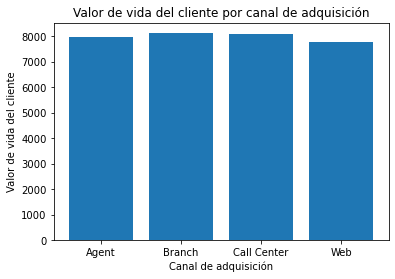

In [8]:
# Gráfico de barras para valor de vida por canal de adquisición
plt.bar(valor_vida_por_canal.index, valor_vida_por_canal['customer_lifetime_value'])
plt.xlabel('Canal de adquisición')
plt.ylabel('Valor de vida del cliente')
plt.title('Valor de vida del cliente por canal de adquisición')
plt.show()

¿Que tipo de clientes son los que más responden a las campañas de marketing? cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
¿Que campaña de marketing ha sido más efectiva?
¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
¿Que campaña de marketing ha sido más efectiva por producto?
¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

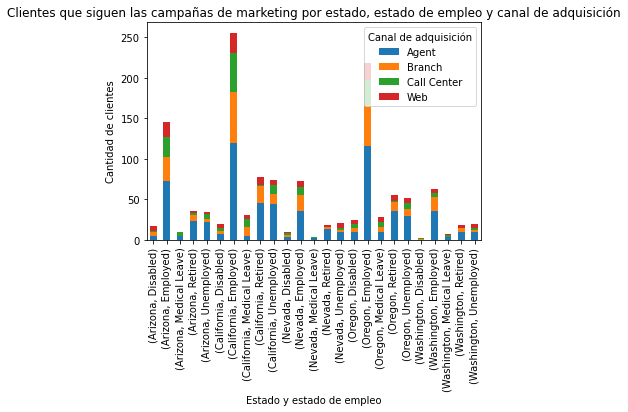

In [46]:
##¿Que tipo de clientes son los que más responden a las campañas de marketing?

perfil_clientes = data[data['response'] == 'Yes'].groupby(['state', 'employmentstatus', 'sales_channel'])['customer'].count()
perfil_clientes = perfil_clientes.unstack(level='sales_channel')
perfil_clientes.plot(kind='bar', stacked=True)
plt.xlabel('Estado y estado de empleo')
plt.ylabel('Cantidad de clientes')
plt.title('Clientes que siguen las campañas de marketing por estado, estado de empleo y canal de adquisición')
plt.legend(title='Canal de adquisición')
plt.show()


In [ ]:
##¿Que campaña de marketing ha sido más efectiva?





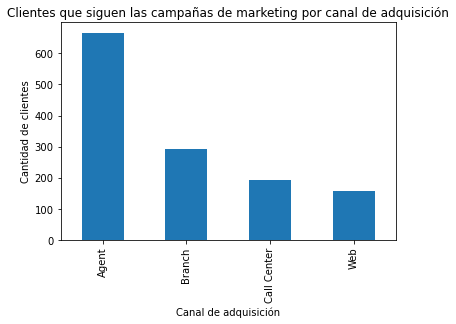

In [42]:
##¿Que campaña de marketing ha sido más efectiva por canal de adquisición?

max_canal = data[data['response'] == 'Yes'].groupby(['sales_channel'])[['sales_channel']].count()

max_canal.plot(kind='bar', legend=False)
plt.xlabel('Canal de adquisición')
plt.ylabel('Cantidad de clientes')
plt.title('Clientes que siguen las campañas de marketing por canal de adquisición')
plt.show()

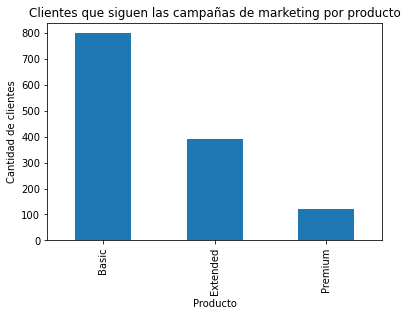

In [43]:
##¿Que campaña de marketing ha sido más efectiva por producto?

max_producto = data[data['response'] == 'Yes'].groupby(['coverage'])[['coverage']].count()
max_producto.plot(kind='bar', legend=False)
plt.xlabel('Producto')
plt.ylabel('Cantidad de clientes')
plt.title('Clientes que siguen las campañas de marketing por producto')
plt.show()

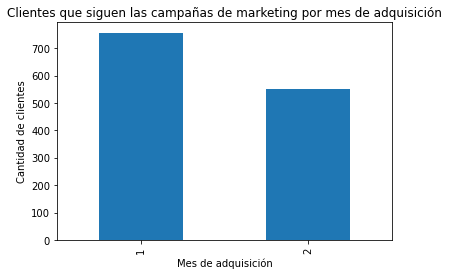

In [44]:
##¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

max_mes = data[data['response'] == 'Yes'].groupby(['mes'])[['mes']].count()
max_mes.plot(kind='bar', legend=False)
plt.xlabel('Mes de adquisición')
plt.ylabel('Cantidad de clientes')
plt.title('Clientes que siguen las campañas de marketing por mes de adquisición')
plt.show()